# Setup

## Bibliotecas

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

rc = {"font.family": "serif",  # fonte serifada
      "mathtext.fontset": "cm",  # texto matemático em LaTeX
      "font.size": 14,  # Usar tamanho 12 ou 14
      "axes.axisbelow": True,  # grid abaixo dos dados
      "text.usetex": True,
      "axes.grid": True
      }

%matplotlib inline

plt.rcParams.update(rc)


## Funções

In [36]:
def regressao_polinomial(x, y, deg=1, return_all=False):
    """
    - Retorna: 
      coeficientes, polinomio, regressão | regressao
    """
    coeficientes = np.polyfit(x, y, deg=deg)
    polinomio = np.poly1d(coeficientes)
    regressao = polinomio(x)
    return [coeficientes, polinomio, regressao] if return_all else regressao


def add_c_grid(ax, a1=0.5, a2=0.5):
    ax.minorticks_on()
    ax.grid(which='major', alpha=a1)
    ax.grid(which='minor', alpha=a2)


def add_sci_limits(ax='both', limits=(0, 0)):
    plt.ticklabel_format(
        axis=ax,
        style='sci',
        useMathText=True,
        scilimits=limits)

def save_tab(tab, file, idx=True, header=True):
    tab.to_latex(
    buf=file,
    bold_rows=True,
    escape=False,
    index=idx,
    encoding='utf-8',
    header=header,
    column_format=len(tab.columns)*'c')

def reg_lin_manual(x, y, retorna_incerteza=False) -> list:
    '''
    Calcula os coeficientes da regressão linear calculada manualmente de x e y.

    # Retorna

    ## retorna_incerteza = False
     * [A, B, reg]

    ## retorna_incerteza = True
    * [A, B, reg, sigma_a, sigma_b]

    # Descrição do retorno:
    * A : Coeficiente linear
    * B: Coeficiente angular
    * reg: vetor de regeressão
    * sigma_a: incerteza de A
    * sigma_b: incerteza de B
    '''

    B = ((np.sum(x) * np.sum(y)) - (x.size * np.sum(x*y))) / \
        (np.sum(x)**2 - (x.size * np.sum(x**2)))

    A = (np.sum(y) - B * np.sum(x)) / (x.size)

    pol = np.poly1d([B, A])
    reg = pol(x)

    if retorna_incerteza:
        S = np.sum(np.power(y - reg, 2))
        den = (x.size * np.sum(x**2)) - (np.sum(x))**2

        sigma_a = S / ((x.size - 2) * np.sqrt(den))
        sigma_b = (S / (x.size - 2)) * np.sqrt(np.sum(x**2)/den)
        return [A, B, reg, sigma_a, sigma_b]

    return [A, B, reg]


In [37]:
tab_1 = pd.DataFrame({'theta_1': np.arange(0, 90.0, 10.0)})
tab_1['theta_2'] = [0.0, 6.0, 12.0, 19.0, 24.0, 30.0, 34.0, 38.0, 40.0]

tab_1


,theta_1,theta_2
0,0.0,0.0
1,10.0,6.0
2,20.0,12.0
3,30.0,19.0
4,40.0,24.0
5,50.0,30.0
6,60.0,34.0
7,70.0,38.0
8,80.0,40.0


In [38]:
tab_1['sen_t1'] = np.sin(np.radians(tab_1['theta_1']))
tab_1['sen_t2'] = np.sin(np.radians(tab_1['theta_2']))

tab_1['sen1/sen2'] = tab_1['sen_t1']/tab_1['sen_t2']

tab_1

,theta_1,theta_2,sen_t1,sen_t2,sen1/sen2
0,0.0,0.0,0.000000,0.000000,NaN
1,10.0,6.0,0.173648,0.104528,1.661253
2,20.0,12.0,0.342020,0.207912,1.645026
3,30.0,19.0,0.500000,0.325568,1.535777
4,40.0,24.0,0.642788,0.406737,1.580353
5,50.0,30.0,0.766044,0.500000,1.532089
6,60.0,34.0,0.866025,0.559193,1.548706
7,70.0,38.0,0.939693,0.615661,1.526314
8,80.0,40.0,0.984808,0.642788,1.532089


In [39]:
A, B, reg, sigma_a, sigma_b = reg_lin_manual(
    x=tab_1['sen_t1'], y=tab_1['sen_t2'], retorna_incerteza=True)


In [75]:
A, B, sigma_a, sigma_b

(-0.007904529758554664,
 0.6583912732670161,
 1.4285003588689546e-05,
 2.8570007177379086e-05,
 1.518853667421624)

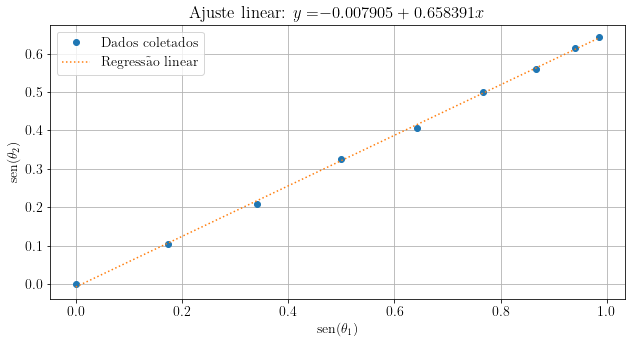

In [40]:
f, ax = plt.subplots(figsize=(9, 5))

# ax.set_aspect('equal')

ax.plot(tab_1['sen_t1'], tab_1['sen_t2'], 'o', label='Dados coletados')
ax.plot(tab_1['sen_t1'], reg, ':', label='Regressão linear')

ax.legend()

ax.set(
    title=r'Ajuste linear: $y=$' + f'${A:.6f} + {B:.6f}x$',
    xlabel=r'sen($\theta_1$)',
    ylabel=r'sen($\theta_2$)'
)

f.tight_layout()
f.savefig('./sen1_sen2.pdf')

plt.show()

In [41]:
tab_1.columns

Index(['theta_1', 'theta_2', 'sen_t1', 'sen_t2', 'sen1/sen2'], dtype='object')

In [42]:
tab_1_latex = tab_1.copy()

tab_1_latex.rename({
    'theta_1': r'$\theta_1 \pm 0.5$',
    'theta_2': r'$\theta_2 \pm 0.5$',
    'sen_t1': r'sen($\theta_1$)',
    'sen_t2': r'sen($\theta_2$)',
    'sen1/sen2': r'sen($\theta_1$)/sen($\theta_2$)'}, axis=1, inplace=True)

tab_1_latex.fillna(r'$\infty$', inplace=True)



save_tab(tab=tab_1_latex, file='./t1.tex', idx=False)

/tmp/ipykernel_3839/1339667704.py:26: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tab.to_latex(


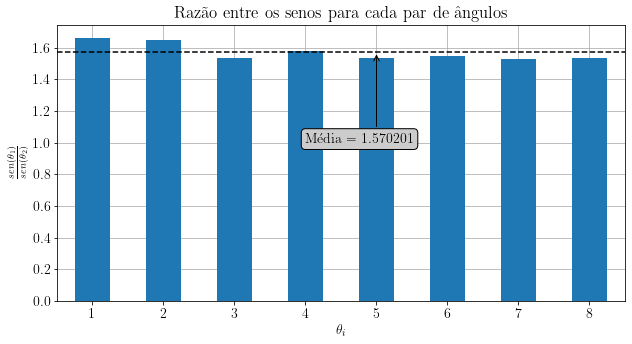

In [73]:
f, ax = plt.subplots(figsize=(9,5))

tab_1.loc[tab_1['sen1/sen2'] > 1, 'sen1/sen2'].plot.bar(ax=ax)

ax.set(
    xlabel=r'$\theta_i$',
    ylabel=r'$\frac{sen(\theta_1)}{sen(\theta_2)}$',
)

m = tab_1['sen1/sen2'].mean()

ax.axhline(m, linestyle='--', color='k')

ax.annotate(
    r'Média = ' + f'{m:.6f}',
    xy=(4, m),
    xycoords='data',
    xytext=(3, 1.0),
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax.set_title(r'Razão entre os senos para cada par de ângulos')

ax.set_xticklabels(labels=range(1,9), rotation=0)

f.tight_layout()

f.savefig('./medias_angulos.pdf')


In [77]:
1/np.sin(np.radians(42))

1.4944765498646086